# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [102]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model and preferences
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass as HSMC

model = HSMC()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in 

# Question 1

**Explain how you solve the model**

/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:66: RuntimeWarning: divide by zero encountered in power
  else:
/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  if par.sigma == 0:


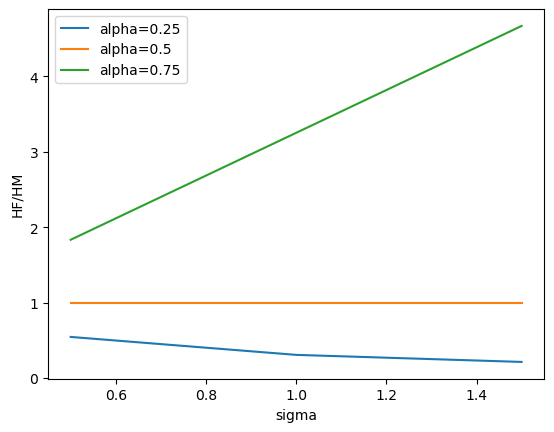

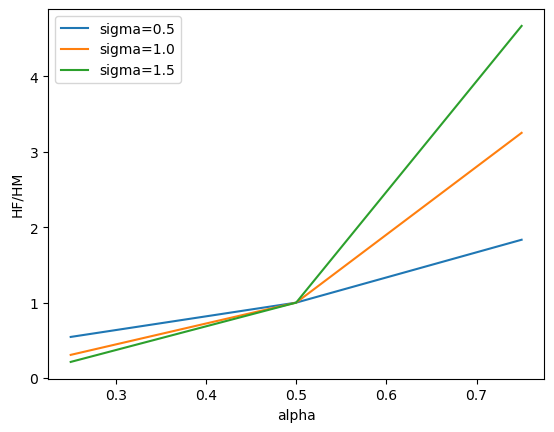

In [103]:


# define values of alpha and sigma to loop through
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

# loop through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # set values of alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model and store the result
        opt = model.solve_discrete()
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM

# plot the results
fig, ax = plt.subplots()
for alpha in alpha_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

fig, ax = plt.subplots()
for sigma in sigma_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, y, label=f"sigma={sigma}")
ax.set_xlabel("alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()


# Question 2

Explain your code and procedure

[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in 

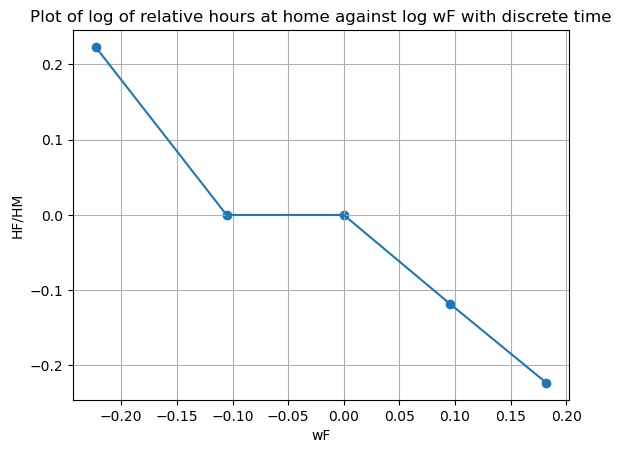

{0.8: 5.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.0, 1.2: 4.0}
{0.8: 4.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.5, 1.2: 5.0}


In [104]:
# create instance of the model
model2 = HSMC()

# define values of alpha and sigma to loop through
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]


# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

for wF in wF_values:
    # set values of alpha and sigma in the model
    model2.par.wF = wF
        
    # solve the model and store the result
    opt = model2.solve_discrete()
    resultsHF[wF] = opt.HF
    resultsHM[wF] = opt.HM

# plot the results
fig, ax = plt.subplots()
for wf in wF_values:
    y = [np.log(resultsHF[wF]/resultsHM[wF]) for wF in wF_values]
ax.plot(np.log(wF_values),y)
ax.scatter(np.log(wF_values),y)
ax.grid(True)
ax.set_xlabel("wF")
ax.set_ylabel("HF/HM")
ax.set_title("Plot of log of relative hours at home against log wF with discrete time")
plt.show()

print(resultsHF)
print(resultsHM)



Når den relative løn for kvinder falder, vil de bruge mere tid hjemmet.

# Question 3

Instead of doing a discrete analysis providng a linear interval we now optimize in each periode to the optimal values for doing work at home for each wage.

In [116]:
model.solve_wF_vec(do_plot=True)


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in 

TypeError: solve_wF_vec() got an unexpected keyword argument 'do_plot'

/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  if par.sigma == 0:
/var/folders/zx/rdpfxtf51ts9s6n9fd90ngx80000gn/T/ipykernel_36684/276265761.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = np.log(model.sol.HF_vec/model.sol.HM_vec)
/var/folders/zx/rdpfxtf51ts9s6n9fd90ngx80000gn/T/ipykernel_36684/276265761.py:8: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.log(model.par.wF_vec), np.log(model.sol.HF_vec/model.sol.HM_vec))
/var/folders/zx/rdpfxtf51ts9s6n9fd90ngx80000gn/T/ipykernel_36684/276265761.py:9: RuntimeWarning: invalid value encountered in true_divide
  ax.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec/model.sol.HM_vec))


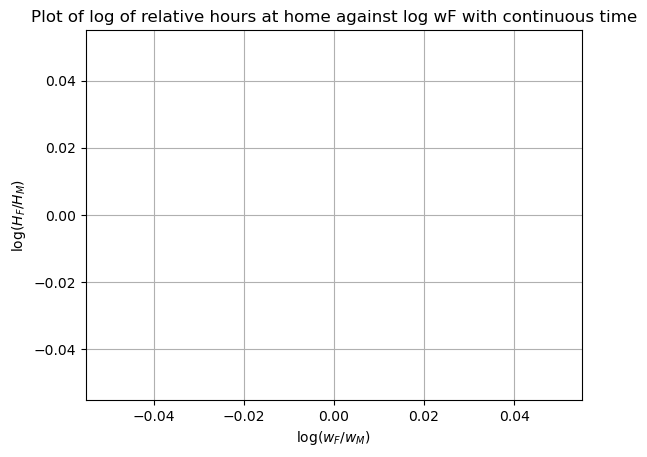

In [112]:
model.solve()

y = np.log(model.sol.HF_vec/model.sol.HM_vec)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plot
ax.plot(np.log(model.par.wF_vec), np.log(model.sol.HF_vec/model.sol.HM_vec))
ax.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec/model.sol.HM_vec))
ax.grid(True)
# add labels
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF with continuous time")
plt.show()

When going from discrete to continuous timeframe we get a more smooth line when chaning the relative wage.

## Question 4

In [101]:
# Printing the result of our regression

model.estimate(do_print=True, do_plotb=True)


None


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/macbookair2018/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in 

In [97]:
# Defining our estimate to minimize the squared differences
def estimate():

    diff0 = model.par.beta0_target - model.run_regression(model.sol.beta0)
    diff1 = model.par.beta1_target - model.run_regression(model.sol.beta1)
   
    return diff0**2 + diff1**2

# Providing initial guess
x0 = [0.5, 1]

# Minimizing the squared differences with our optimize/minimize
res = optimize.minimize(estimate, x0)

print(res)

TypeError: estimate() takes 0 positional arguments but 1 was given